<a href="https://colab.research.google.com/github/ElinaZ7/AH2179_ElinaZhang/blob/main/Hand_In_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 4: Use the neural network model for bus arrival delay prediction
Elina Zhang AH2179

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [16]:
# Load data
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url).iloc[:1000]
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Split into features and target
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Construct a more complex network with dropout layers
def construct_optimized_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=4))    # First hidden layer with more neurons
    model.add(Dropout(0.3))                                # Dropout to reduce overfitting
    model.add(Dense(128, activation='relu'))               # Second hidden layer with more neurons
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))                # Third hidden layer
    model.add(Dense(1))                                    # Output layer
    return model

model = construct_optimized_model()
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Early stopping, learning rate reduction, and model checkpointing
early_stop = EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.2, patience=5, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_mae', save_best_only=True, mode='min', verbose=1)

# Train the model with callback functions
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr, checkpoint], verbose=1)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 157.4849 - mae: 157.4849
Epoch 1: val_mae improved from inf to 38.25652, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 155.4723 - mae: 155.4723 - val_loss: 38.2565 - val_mae: 38.2565 - learning_rate: 0.0010
Epoch 2/200
16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.7153 - mae: 55.7153  
Epoch 2: val_mae improved from 38.25652 to 27.28022, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 53.7761 - mae: 53.7761 - val_loss: 27.2802 - val_mae: 27.2802 - learning_rate: 0.0010
Epoch 3/200
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.7243 - mae: 38.7243  
Epoch 3: val_mae did not improve from 27.28022
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.3220 - mae: 38.3220 - val_loss: 33.6012 - val_mae: 33.6012 - learning_rate: 0.0010
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.0778 - mae: 32.0778  
Epoch 4: val_mae improved from 27.28022 to 24.72

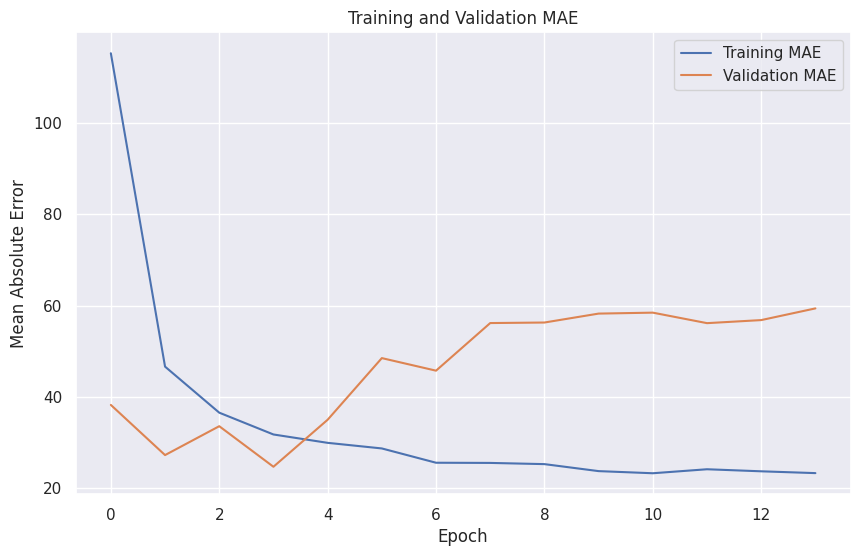

In [19]:
# Visualize training process
sns.set()
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [20]:
# Evaluate model performance on test data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'Results after tuning the neural network'+"---------------------------------------------")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
--------------------------------------Results after tuning the neural network---------------------------------------------
Mean Absolute Error: 22.076609778031706
Mean Squared Error: 744.3111749134863
R-squared: 0.9700655341148376


In [21]:
# Compare with the linear regression model again
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('--------------------------------------'+'Results from linear regression model'+"---------------------------------------------")
print(f"Mean Absolute Error of linear model: {mae_linear}")
print(f"Mean Squared Error of linear model: {mse_linear}")
print(f"R-squared of linear model: {r2_linear}")

--------------------------------------Results from linear regression model---------------------------------------------
Mean Absolute Error of linear model: 9.12762875155385
Mean Squared Error of linear model: 164.53315546398673
R-squared of linear model: 0.9933828649167205
